# Random Forest


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting it into test and trainning data

In [43]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

Trainning the model

In [66]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=2000,random_state=33)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

Applying the model on the test data

In [64]:
predicted = clf.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [65]:
print("Accuracy:", clf.score(X_test, y_test))

('Accuracy:', 0.9661904761904762)


In [59]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


confusion_matrix:
[[795   0   1   0   2   1   5   0   9   0]
 [  0 946   6   3   0   1   1   1   3   0]
 [  3   0 835   4   0   0   6   6   5   1]
 [  2   1  14 819   0   9   1   6   8   3]
 [  2   3   0   0 792   1   4   1   5  19]
 [  4   1   2   8   2 730   3   2   4   0]
 [  4   1   0   0   2   5 828   0   1   0]
 [  1   3  13   3   7   0   0 859   0  13]
 [  1   3   1   9   5   8   5   1 731   4]
 [  8   1   2   7  12   4   1  10   6 761]]


In [60]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       813
          1       0.99      0.98      0.99       961
          2       0.96      0.97      0.96       860
          3       0.96      0.95      0.95       863
          4       0.96      0.96      0.96       827
          5       0.96      0.97      0.96       756
          6       0.97      0.98      0.98       841
          7       0.97      0.96      0.96       899
          8       0.95      0.95      0.95       768
          9       0.95      0.94      0.94       812

avg / total       0.96      0.96      0.96      8400



**Viewing the the ones that predicted wrong**

In [61]:
(y_test != predicted).sum()

304

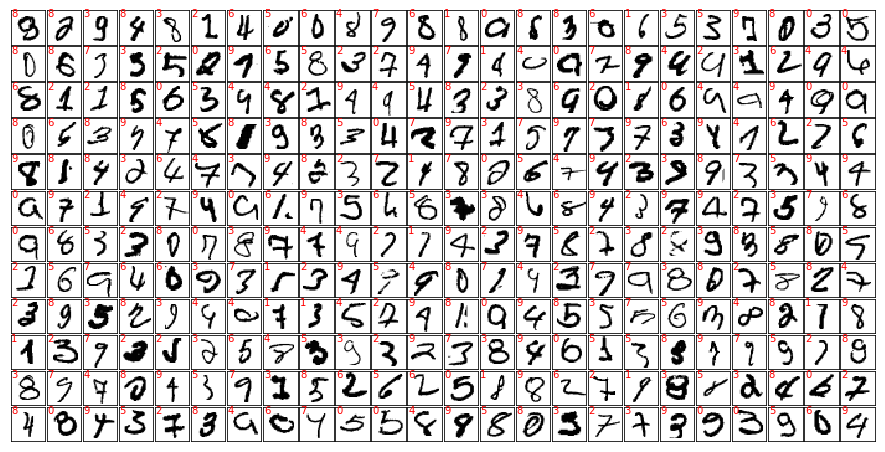

In [62]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(288):
    ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[i]), color='red')
    
    # label the image with the target value
    #if predicted[i] == expected[i]:
    #    ax.text(0, 7, str(predicted[i]), color='green')
    #else:
    #    ax.text(0, 7, str(predicted[i]), color='red')
